<a href="https://colab.research.google.com/github/davip99/Proyecto-Luca/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<!-- ---------------------------------------------------- -->
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
 <h1>Proyecto Análisis de Datos de La Liga 2019 - 2020</h1>
        <br>
        <br>
        <strong> Análisis de Datos con Python</strong></a>
	  </center>
    <!-- Pandas Tutorial -->

  </div>
<!-- ---------------------------------------------------- -->


La temporada *2019-20 de La Liga*, fue la 89ª desde su creación. *Esta fue la segunda temporada de La Liga con VAR*.

Como en temporadas anteriores, consta de un grupo único integrado por veinte clubes de toda la geografía española. Siguiendo un sistema de liga, los veinte equipos se enfrentarán todos contra todos en dos ocasiones, una en campo propio y otra en campo contrario, sumando un total de 38 jornadas. El orden de los encuentros se decidió por sorteo antes de empezar la competición.

 A falta de una jornada para el final, el Real Madrid se coronó campeón por trigesimocuarta vez en su historia.
   
* **SOBRE EL PROYECTO:**

En este proyecto analizaremos el patrón en los datos que nos ayudarán a obtener más información sobre la temporada de La Liga.

---

### 1. Importación de Librerías:
Importa las siguientes librerías:
   * numpy : para operaciones.
   * pandas: para manipulación de datos
   * ipywidgets: añadir interactividad a las tablas
   * IPython.display: mostrar tablas html

In [4]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from IPython.display import clear_output

### 2. Los Datos:

El conjunto de datos contiene información sobre todos y cada uno de los partidos jugados en la temporada de La Liga 2019-20, y con la ayuda de los datos intentaremos obtener información sobre la temporada.
  
  El conjunto de datos se descarga desde: http://football-data.co.uk/data.php

* La data contiene los siguientes campos:

    * Div : División (Primera, Segunda) como he descargado sólo el de 1ra siempre aparecerá 1
    * Date : Día del Partido (dd/mm/yy)
    * HomeTeam : Equipo Local
    * AwayTeam : Equipo Visitante
    * FTHG : (Full Time Home Team Goals) Goles de Local en el tiempo completo
    * FTAG : (Full Time Away Team Goals) Goles de Visitante en el tiempo completo
    * FTR : (Full Time Result) Resultado Final en tiempo Completo (H=Home Win, D=Draw, A=Away Win)
    * HTHG : (Half Time Home Team Goal) Goles del equipo local al medio tiempo
    * HTAG : (Half Time Away Team) Goals Goles del equipo visitante al medio tiempo
    * HTR : (Half Time Result) Resultado en el medio tiempo (H=Home Win, D=Draw, A=Away Win)
    * HS : (Home Team Shots) Remates equipo local
    * AS : (Away Team Shots) Remates equipo visitante
    * HST : (Home Team Shots on Target) Remates equipo local al arco
    * AST : (Away Team Shots on Target) Remates equipo visitante al arco
    * HF : (Home Team Fouls) Faltas Cometidas equipo local
    * AF : (Away Tema Fouls) Faltas Cometidas equipo visitante
    * HC : (Home Team Corners) Corners equipo local
    * AC : (Away Team Corners) Corners equipo visitante
    * HY : (Home Team Yellow Cards) Tarjetas Amarillas equipo local
    * AY : (Away Team Yellow Cards) Tarjetas Amarillas equipo visitante
    * HR : (Home Team Red Cards) Tarjetas Rojas equipo local
    * AR : (Away Team Red Cards) Tarjetas Rojas equipo visitante
    

* Nota: No estamos incluyendo las * columnas de apuestas * en nuestro proyecto.

* **Leer los datos del archivo laliga2019_2020.csv.**

In [5]:
df = pd.read_csv("laliga2019_2020.csv")

* **Usa las funciones básicas para ver el conjunto de datos y la información sobre el conjunto de datos.**

In [6]:
df.info()
print(df.columns[:22])
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 105 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(7)
memory usage: 311.8+ KB
Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR'],
      dtype='object')


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,16/08/2019,20:00,Ath Bilbao,Barcelona,1,0,H,0,0,...,1.97,0.75,1.93,2.00,1.91,2.01,2.02,2.03,1.91,1.98
1,SP1,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,1,...,2.63,1.00,1.82,1.97,1.85,2.07,2.00,2.20,1.82,2.06
2,SP1,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,0,...,1.82,-0.75,1.94,1.99,1.92,2.00,1.96,2.12,1.89,2.00
3,SP1,17/08/2019,19:00,Mallorca,Eibar,2,1,H,1,0,...,1.66,0.00,2.11,1.82,2.09,1.83,2.12,1.88,2.07,1.83
4,SP1,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,0,...,1.46,-0.50,1.89,2.04,1.90,2.01,1.95,2.06,1.90,1.99


* **Seleccionar las mejores columnas del conjunto de datos:**

    * Como solo queremos las primeras 22 columnas, todas las otras columnas son básicamente las columnas de apuestas.
    * Entonces dividiremos el marco de datos que nos dará el conjunto de datos que tiene las primeras 22 columnas.

In [7]:
new_liga = df.iloc[:,:22]
print(new_liga)

     Div        Date   Time    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    SP1  16/08/2019  20:00  Ath Bilbao    Barcelona     1     0   H     0   
1    SP1  17/08/2019  16:00       Celta  Real Madrid     1     3   A     0   
2    SP1  17/08/2019  18:00    Valencia     Sociedad     1     1   D     0   
3    SP1  17/08/2019  19:00    Mallorca        Eibar     2     1   H     1   
4    SP1  17/08/2019  20:00     Leganes      Osasuna     0     1   A     0   
..   ...         ...    ...         ...          ...   ...   ...  ..   ...   
375  SP1  19/07/2020  20:00     Granada   Ath Bilbao     4     0   H     1   
376  SP1  19/07/2020  20:00     Leganes  Real Madrid     2     2   D     1   
377  SP1  19/07/2020  20:00     Levante       Getafe     1     0   H     0   
378  SP1  19/07/2020  20:00     Osasuna     Mallorca     2     2   D     1   
379  SP1  19/07/2020  20:00     Sevilla     Valencia     1     0   H     0   

     HTAG  ...  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  
0   

### Revisar el tipo de dato y si hay datos nulos de las columnas

In [8]:
print(new_liga.isnull().sum())
print(new_liga.dtypes)

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
dtype: int64
Div         object
Date        object
Time        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
dtype: object


* Hay un total de 380 filas, lo que significa que se jugaron 380 partidos en toda la temporada.
    * El dataframe contiene 22 columnas: 16 tienen valores enteros y 6 tienen valores de texto.
    * Ninguna columna tiene valores de NaN.

### Ver resumen de estadísticas del dataframe

In [9]:
new_liga.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.436842,1.042105,0.602632,0.450000,12.463158,10.136842,4.336842,3.510526,13.663158,13.789474,5.042105,4.194737,2.547368,2.584211,0.100000
std,1.199697,1.029033,0.829848,0.673764,4.690552,4.080614,2.438091,1.959321,4.214839,3.935884,2.676649,2.322080,1.549659,1.480128,0.333685
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,11.000000,11.000000,3.000000,2.750000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,3.000000,13.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,15.000000,12.250000,6.000000,5.000000,16.000000,16.000000,7.000000,6.000000,4.000000,4.000000,0.000000
max,6.000000,5.000000,4.000000,3.000000,25.000000,24.000000,17.000000,12.000000,28.000000,30.000000,14.000000,12.000000,7.000000,8.000000,2.000000


* **Borra la columna Div que indica la primera división.**

In [10]:
new_liga.drop("Div", axis=1)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,16/08/2019,20:00,Ath Bilbao,Barcelona,1,0,H,0,0,D,...,11,5,2,14,9,3,8,1,1,0
1,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,1,A,...,17,4,11,17,12,6,4,5,2,0
2,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,0,D,...,12,6,3,13,14,3,3,4,4,1
3,17/08/2019,19:00,Mallorca,Eibar,2,1,H,1,0,H,...,11,4,5,13,14,9,3,2,3,0
4,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,0,D,...,4,2,2,17,11,8,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/07/2020,20:00,Granada,Ath Bilbao,4,0,H,1,0,H,...,11,6,3,10,11,2,3,1,2,0
376,19/07/2020,20:00,Leganes,Real Madrid,2,2,D,1,1,D,...,7,7,4,9,11,5,2,4,1,0
377,19/07/2020,20:00,Levante,Getafe,1,0,H,0,0,D,...,13,4,4,10,12,6,8,2,4,0
378,19/07/2020,20:00,Osasuna,Mallorca,2,2,D,1,1,D,...,12,5,4,17,10,3,5,2,0,0


* **Revisa el tipo de dato de la columna Date.**

In [11]:
new_liga.dtypes["Date"]

dtype('O')

 * **cambia el tipo de dato a timestamp object con to_datetime**

In [129]:
new_liga["Date"] = pd.to_datetime(new_liga["Date"], dayfirst=True)
print(new_liga)


     Div       Date   Time    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    SP1 2019-08-16  20:00  Ath Bilbao    Barcelona     1     0   H     0   
1    SP1 2019-08-17  16:00       Celta  Real Madrid     1     3   A     0   
2    SP1 2019-08-17  18:00    Valencia     Sociedad     1     1   D     0   
3    SP1 2019-08-17  19:00    Mallorca        Eibar     2     1   H     1   
4    SP1 2019-08-17  20:00     Leganes      Osasuna     0     1   A     0   
..   ...        ...    ...         ...          ...   ...   ...  ..   ...   
375  SP1 2020-07-19  20:00     Granada   Ath Bilbao     4     0   H     1   
376  SP1 2020-07-19  20:00     Leganes  Real Madrid     2     2   D     1   
377  SP1 2020-07-19  20:00     Levante       Getafe     1     0   H     0   
378  SP1 2020-07-19  20:00     Osasuna     Mallorca     2     2   D     1   
379  SP1 2020-07-19  20:00     Sevilla     Valencia     1     0   H     0   

     HTAG  ...  HF  AF  HC  AC  HY  AY  HR  SHHG  SHAG  SHR  
0       0  ..

* **Revisa nuevamente el tipo de dato de la columna Date.**

In [13]:
new_liga.dtypes["Date"]

dtype('<M8[ns]')

* **Crear 3 nuevas columnas:**
    * Goles en casa en la segunda mitad (SHHG)
    * Goles de vistante en la segunda mitad (SHAG)
    * Resultado de la segunda mitad (SHR)

In [14]:
new_liga["SHHG"] = new_liga["FTHG"] - new_liga["HTHG"]
print(new_liga["SHHG"])

0      1
1      1
2      1
3      1
4      0
      ..
375    3
376    1
377    1
378    1
379    1
Name: SHHG, Length: 380, dtype: int64


In [15]:
new_liga["SHAG"] = new_liga["FTAG"] - new_liga["HTAG"]
print(new_liga["SHAG"])

0      0
1      2
2      1
3      1
4      1
      ..
375    0
376    1
377    0
378    1
379    0
Name: SHAG, Length: 380, dtype: int64


In [16]:
condiciones = [(new_liga["SHHG"] > new_liga["SHAG"]), (new_liga["SHHG"] == new_liga["SHAG"]), (new_liga["SHHG"] < new_liga["SHAG"])]
valores = ['H', 'D', 'A']
new_liga["SHR"] = np.select(condiciones, valores, default= "otros")

print(new_liga["SHR"])

0      H
1      A
2      D
3      D
4      A
      ..
375    H
376    D
377    H
378    D
379    H
Name: SHR, Length: 380, dtype: object


In [118]:
"""print(new_liga["SHHG"], new_liga["SHAG"], new_liga["SHR"])"""
print(new_liga[["SHHG", "SHAG", "SHR"]])

     SHHG  SHAG SHR
0       1     0   H
1       1     2   A
2       1     1   D
3       1     1   D
4       0     1   A
..    ...   ...  ..
375     3     0   H
376     1     1   D
377     1     0   H
378     1     1   D
379     1     0   H

[380 rows x 3 columns]


* El proceso de limpieza de datos se ha realizado. Ahora podemos avanzar y hacer la tabla de la liga basada en el conjunto de datos que tenemos.


### Total de partidos jugados en la temporada

In [18]:
new_liga.shape[0]

380

### Porcentajes de partidos ganados por el equipo local, empatados y ganados por el equipo visitante

In [27]:
porcentaje = new_liga["FTR"].value_counts("H")*100

### Crea un dataframe con una columna partidos que diga: (ganados, empatados o perdidados) y  otro con el porcentaje de la anterior celda

In [127]:

df_Partidos = pd.DataFrame({"Partidos": ["Ganado", "Empatado", "Perdido"], "Porcentaje": porcentaje}).reset_index().drop(columns='FTR')
print(df_Partidos)

   Partidos  Porcentaje
0    Ganado   45.789474
1  Empatado   27.631579
2   Perdido   26.578947


### Crear una pie chart con pandas del anterior dataframe

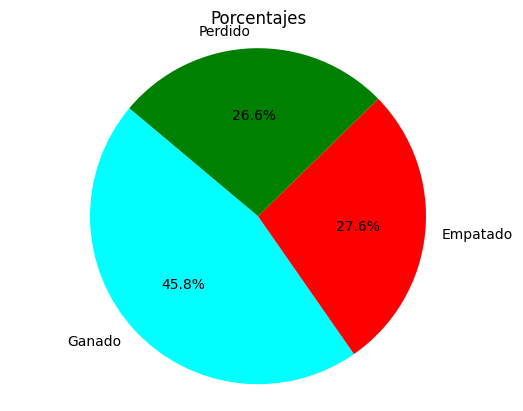

In [29]:
plt.pie(df_Partidos["Porcentaje"], labels=df_Partidos["Partidos"], colors=["Cyan","Red","Green"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Porcentajes')
plt.show()


### Cantidad de Goles por Partido de local, visitante de todos los equipos y por partido

In [30]:
"""new_liga["Local"] = new_liga.groupby(["HomeTeam"])["FTHG"].sum()
new_liga["Visitante"] = new_liga.groupby(["AwayTeam"])["FTAG"].sum()
new_liga["Goles"] = (new_liga["Local"] + new_liga["Visitante"]) / 36
print(new_liga[["Local", "Visitante", "Goles"]])"""

local = new_liga["FTHG"].sum()
visitante = new_liga["FTAG"].sum()
medialocal = local/new_liga.shape[0]
mediavisitante = visitante/new_liga.shape[0]
print(local, medialocal)
print(visitante, mediavisitante)

546 1.436842105263158
396 1.0421052631578946


### Crea un dataframe con una columna partidos que diga: Local y Visitante y otra columna con la cantidad de goles marcandos

In [31]:
df_goles = pd.DataFrame({"partidos":["Local","Visitante"], "Goles marcados":[local, visitante]})
print(df_goles)

    partidos  Goles marcados
0      Local             546
1  Visitante             396


### Crear una pie chart con pandas del anterior dataframe

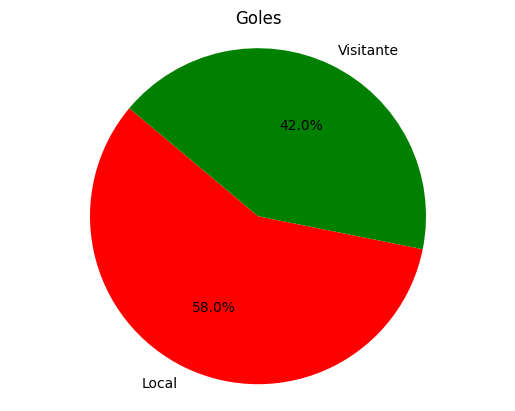

In [32]:
plt.pie(df_goles["Goles marcados"], labels=df_goles["partidos"], colors=["Red","Green"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Goles')
plt.show()

### Remates equipo local y visitante y remates a puerta equipo local y visitante

In [33]:
remates = new_liga[["HS", "AS", "HST", "AST"]]
print(remates)


     HS  AS  HST  AST
0    11  11    5    2
1     7  17    4   11
2    14  12    6    3
3    16  11    4    5
4    13   4    2    2
..   ..  ..  ...  ...
375  11  11    6    3
376  15   7    7    4
377  13  13    4    4
378  12  12    5    4
379  16   8    4    2

[380 rows x 4 columns]


### Crear una bar chart con pandas del anterior dataframe

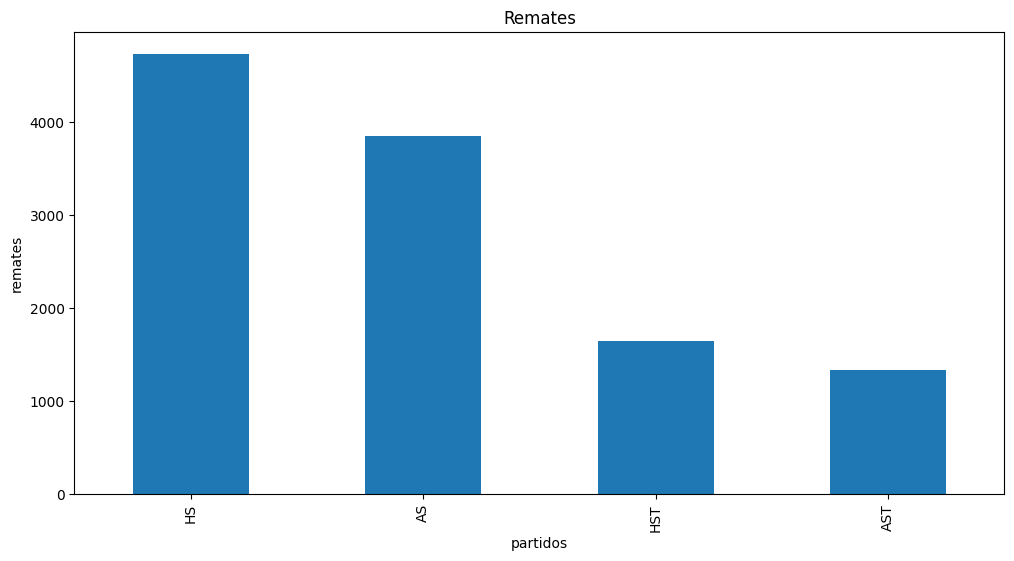

In [34]:
remates.sum().plot(kind="bar", figsize=(12,6))
plt.title('Remates')
plt.xlabel("partidos")
plt.ylabel("remates")
plt.show()

### Real Madrid porcentaje de Victoria,Empates y Derrotas

#### Crea otro dataframe con el filtro de Real Madrid como equipo local y otro dataframe con las columnas del real madrid como visitante

In [35]:
df_rm_l = new_liga[new_liga["HomeTeam"] == "Real Madrid"]
df_rm_v = new_liga[new_liga["AwayTeam"] == "Real Madrid"]

print("Local")
print(df_rm_l)
print("Visitante")
print(df_rm_v)

Local
     Div       Date   Time     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  \
13   SP1 2019-08-24  18:00  Real Madrid  Valladolid     1     1   D     0   
31   SP1 2019-09-14  12:00  Real Madrid     Levante     3     2   H     3   
56   SP1 2019-09-25  20:00  Real Madrid     Osasuna     2     0   H     1   
72   SP1 2019-05-10  15:00  Real Madrid     Granada     4     2   H     2   
105  SP1 2019-10-30  20:15  Real Madrid     Leganes     5     0   H     3   
112  SP1 2019-02-11  20:00  Real Madrid       Betis     0     0   D     0   
133  SP1 2019-11-23  20:00  Real Madrid    Sociedad     3     1   H     1   
150  SP1 2019-07-12  12:00  Real Madrid     Espanol     2     0   H     1   
179  SP1 2019-12-22  20:00  Real Madrid  Ath Bilbao     0     0   D     0   
192  SP1 2020-01-18  15:00  Real Madrid     Sevilla     2     1   H     0   
211  SP1 2020-01-02  15:00  Real Madrid  Ath Madrid     1     0   H     0   
238  SP1 2020-02-16  20:00  Real Madrid       Celta     2     2   D   

### Contar la cantidad de juegos ganados tanto de local, como visitante por el Real Madrid

In [36]:
juegos_l = df_rm_l[df_rm_l.FTR == "H"].shape[0]
juegos_v = df_rm_v[df_rm_v.FTR == "A"].shape[0]

print("Juegos ganados en local: ", juegos_l)
print("Juegos ganados en visitante: ", juegos_v)




Juegos ganados en local:  15
Juegos ganados en visitante:  11


### Lista los nombres de los clubes de la liga española

In [37]:
clubes = new_liga["HomeTeam"].unique()
print(list(clubes))

['Ath Bilbao', 'Celta', 'Valencia', 'Mallorca', 'Leganes', 'Villarreal', 'Alaves', 'Espanol', 'Betis', 'Ath Madrid', 'Granada', 'Levante', 'Osasuna', 'Real Madrid', 'Getafe', 'Barcelona', 'Sevilla', 'Sociedad', 'Eibar', 'Valladolid']


### Usar ipywidgets para mostrar y filtrar los juegos de local de cada equipo de la liga

In [45]:
def filter_display(team):
    filtered_df = new_liga[new_liga['HomeTeam'] == team]
    display(filtered_df)

team_dropdown = widgets.Dropdown(options=list(clubes), value=list(clubes)[0], description='Team: ')
filter_button = widgets.Button(description='Filter')

def on_button_click(b):
    clear_output(wait=True)
    display(team_dropdown)
    display(filter_button)
    filter_display(team_dropdown.value)

filter_button.on_click(on_button_click)

display(team_dropdown)
display(filter_button)

Dropdown(description='Team: ', index=13, options=('Ath Bilbao', 'Celta', 'Valencia', 'Mallorca', 'Leganes', 'V…

Button(description='Filter', style=ButtonStyle())

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HF,AF,HC,AC,HY,AY,HR,SHHG,SHAG,SHR
13,SP1,2019-08-24,18:00,Real Madrid,Valladolid,1,1,D,0,0,...,12,11,4,3,2,2,0,1,1,D
31,SP1,2019-09-14,12:00,Real Madrid,Levante,3,2,H,3,0,...,13,10,9,6,2,2,0,0,2,A
56,SP1,2019-09-25,20:00,Real Madrid,Osasuna,2,0,H,1,0,...,13,13,7,5,2,2,0,1,0,H
72,SP1,2019-05-10,15:00,Real Madrid,Granada,4,2,H,2,0,...,12,18,6,2,4,5,0,2,2,D
105,SP1,2019-10-30,20:15,Real Madrid,Leganes,5,0,H,3,0,...,12,12,8,3,1,5,0,2,0,H
112,SP1,2019-02-11,20:00,Real Madrid,Betis,0,0,D,0,0,...,11,17,9,4,2,4,0,0,0,D
133,SP1,2019-11-23,20:00,Real Madrid,Sociedad,3,1,H,1,1,...,13,16,4,3,1,1,0,2,0,H
150,SP1,2019-07-12,12:00,Real Madrid,Espanol,2,0,H,1,0,...,15,13,5,3,4,3,1,1,0,H
179,SP1,2019-12-22,20:00,Real Madrid,Ath Bilbao,0,0,D,0,0,...,8,14,6,4,1,0,0,0,0,D
192,SP1,2020-01-18,15:00,Real Madrid,Sevilla,2,1,H,0,0,...,17,12,2,4,3,1,0,2,1,H


### Usar ipywidgets para mostrar y filtrar la cantidad de juegos que ganó cada equipo de la liga

In [49]:
def filter_display2(team):
    victorias_en_casa = new_liga[(new_liga['HomeTeam'] == team) & (new_liga["FTR"] == "H")]
    victorias_en_visitante = new_liga[(new_liga['AwayTeam'] == team) & (new_liga["FTR"] == "A")]
    total_victorias = pd.concat([victorias_en_casa, victorias_en_visitante])
    display("Cantidad de partidos ganados: ", len(total_victorias))

def on_button_click2(b):
    clear_output(wait=True)
    display(team_dropdown2)
    display(filter_button2)
    filter_display2(team_dropdown2.value)

team_dropdown2 = widgets.Dropdown(options=list(clubes), value=list(clubes)[0], description='Team: ')
filter_button2 = widgets.Button(description='Filter')

filter_button2.on_click(on_button_click2)

display(team_dropdown2)
display(filter_button2)

Dropdown(description='Team: ', index=18, options=('Ath Bilbao', 'Celta', 'Valencia', 'Mallorca', 'Leganes', 'V…

Button(description='Filter', style=ButtonStyle())

'Cantidad de partidos ganados: '

11

### 3. La Tabla de Liga:

* La tabla de la liga incluirá las siguientes columnas:
    * Club: nombre del club.
    * MP: total de partidos jugados.
    * W: número total de victorias.
    * D: número total de empates.
    * L: número total de derrotas.
    * GF: número total de goles marcados.
    * GA: número total de goles recibidos.
    * GD: diferencia de goles (GF-GA).
    * Pts: puntos totales.

### Correr la siguiente celda con la función *'crear_tabla'*

In [50]:
#clubes de la liga en un array
clubs = new_liga['HomeTeam'].unique()

def crear_tabla(clubs, df, side):
    ## side = home/away/all
    ## home = para crear una tabla de los partidos locales de la liga
    ## away =  para crear una tabla de los partidos visitante de la liga
    ## all = para crear una tabla de todos los valores de la liga

    #diccionario que incluirá la información de cada club
    league_table = dict()

    for club in clubs:
        ## iterar a través del club y completar los valores en el diccionario league_table
        ## match played, win, draw, lose, goals for, goals against, goal difference, clean sheets, points
        mp, w, d, l, gf, ga, gd, cs, pts = 0, 0, 0, 0, 0, 0, 0, 0, 0


        ## recorrerá todo el conjunto de datos y calculará todos los resultados
        for i in range(len(df)):
            ## la cláusula if-else verificará las condiciones para los equipos locales y visitantes
            ## y según la condición calculará los resultados requeridos
            ## cuando el club es un equipo local
            ## el parámetro de side es para checkear si es unaa tabla de local o no
            if df.iloc[i]['HomeTeam'] == club and (side == 'home' or side == 'all'):

                if df.iloc[i]['FTR'] == 'H':
                    #cuando el equipo local gana, se suma 1 victoria y 3 puntos
                    w += 1
                    pts += 3

                elif df.iloc[i]['FTR'] == 'A':
                    l += 1
                #cuando el equipo visitante gana, se suma 1 derrota y 0 puntos

                else:
                 #cuando se empata, se suma 1 empate y 0 puntos

                    d += 1
                    pts += 1

                ##calculando los goles a favor y los goles en contra
                gf += df.iloc[i]['FTHG']
                ga += df.iloc[i]['FTAG']


                 ## calculando los partidos con portería a 0
                if df.iloc[i]['FTAG'] == 0:
                    cs += 1

                ## incrementar la cantidad de partidos jugados
                mp += 1


            # cuando el club es un equipo visitante
            ## el parámetro de side es para checkear si es unaa tabla de visitante o no

            elif df.iloc[i]['AwayTeam'] == club and (side == 'away' or side == 'all'):

                if df.iloc[i]['FTR'] == 'H':
                    #cuando el equipo local gana, se suma 1 derrota  y 0 puntos
                    l += 1

                elif df.iloc[i]['FTR'] == 'A':
                   #cuando el equipo local pierde, se suma 1 victoria y 3 puntos
                    w += 1
                    pts += 3

                else:
                #cuando se empata, se suma 1 empate y 0 puntos

                    d += 1
                    pts += 1

                ##calculando los goles a favor y los goles en contra

                gf += df.iloc[i]['FTAG']
                ga += df.iloc[i]['FTHG']


                ## calculando los partidos con portería a 0
                if df.iloc[i]['FTHG'] == 0:
                    cs += 1

                ## incrementar la cantidad de partidos jugados
                mp += 1

        #calculando la diferencia de gol
        gd = gf - ga

        ## colocando todos los parámetros en un diccionario con una llave que es el nombre del club
        league_table[club] = {'MP': mp, 'W': w, 'D': d, 'L': l, 'GF': gf, 'GA': ga, 'GD': gd, 'CS': cs, 'PTS': pts}

    #diccionario con los datos anteriores calculados
    return league_table

### Asigna a  la función crear_tabla(clubs, laliga, side='all') en una variable tabla_liga e imprimela

In [51]:
tabla_liga = crear_tabla(clubs, new_liga, "all")
print(tabla_liga)

{'Ath Bilbao': {'MP': 38, 'W': 13, 'D': 12, 'L': 13, 'GF': 41, 'GA': 38, 'GD': 3, 'CS': 12, 'PTS': 51}, 'Celta': {'MP': 38, 'W': 7, 'D': 16, 'L': 15, 'GF': 37, 'GA': 49, 'GD': -12, 'CS': 12, 'PTS': 37}, 'Valencia': {'MP': 38, 'W': 14, 'D': 11, 'L': 13, 'GF': 46, 'GA': 53, 'GD': -7, 'CS': 8, 'PTS': 53}, 'Mallorca': {'MP': 38, 'W': 9, 'D': 6, 'L': 23, 'GF': 40, 'GA': 65, 'GD': -25, 'CS': 5, 'PTS': 33}, 'Leganes': {'MP': 38, 'W': 8, 'D': 12, 'L': 18, 'GF': 30, 'GA': 51, 'GD': -21, 'CS': 9, 'PTS': 36}, 'Villarreal': {'MP': 38, 'W': 18, 'D': 6, 'L': 14, 'GF': 63, 'GA': 49, 'GD': 14, 'CS': 12, 'PTS': 60}, 'Alaves': {'MP': 38, 'W': 10, 'D': 9, 'L': 19, 'GF': 34, 'GA': 59, 'GD': -25, 'CS': 9, 'PTS': 39}, 'Espanol': {'MP': 38, 'W': 5, 'D': 10, 'L': 23, 'GF': 27, 'GA': 58, 'GD': -31, 'CS': 6, 'PTS': 25}, 'Betis': {'MP': 38, 'W': 10, 'D': 11, 'L': 17, 'GF': 48, 'GA': 60, 'GD': -12, 'CS': 6, 'PTS': 41}, 'Ath Madrid': {'MP': 38, 'W': 18, 'D': 16, 'L': 4, 'GF': 51, 'GA': 27, 'GD': 24, 'CS': 17, 'PTS

### Crear un dataframe llamado tabla_liga_df con el diccionario tabla_liga

In [52]:
df_tabla_liga = pd.DataFrame(tabla_liga)
print(df_tabla_liga)

     Ath Bilbao  Celta  Valencia  Mallorca  Leganes  Villarreal  Alaves  \
MP           38     38        38        38       38          38      38   
W            13      7        14         9        8          18      10   
D            12     16        11         6       12           6       9   
L            13     15        13        23       18          14      19   
GF           41     37        46        40       30          63      34   
GA           38     49        53        65       51          49      59   
GD            3    -12        -7       -25      -21          14     -25   
CS           12     12         8         5        9          12       9   
PTS          51     37        53        33       36          60      39   

     Espanol  Betis  Ath Madrid  Granada  Levante  Osasuna  Real Madrid  \
MP        38     38          38       38       38       38           38   
W          5     10          18       16       14       13           26   
D         10     11     

### Convertir columnas en filas y filas en columnas, usando .transpose()

In [53]:
df_tabla_liga_t = df_tabla_liga.transpose()
print(df_tabla_liga_t)

             MP   W   D   L  GF  GA  GD  CS  PTS
Ath Bilbao   38  13  12  13  41  38   3  12   51
Celta        38   7  16  15  37  49 -12  12   37
Valencia     38  14  11  13  46  53  -7   8   53
Mallorca     38   9   6  23  40  65 -25   5   33
Leganes      38   8  12  18  30  51 -21   9   36
Villarreal   38  18   6  14  63  49  14  12   60
Alaves       38  10   9  19  34  59 -25   9   39
Espanol      38   5  10  23  27  58 -31   6   25
Betis        38  10  11  17  48  60 -12   6   41
Ath Madrid   38  18  16   4  51  27  24  17   70
Granada      38  16   8  14  52  45   7  13   56
Levante      38  14   7  17  47  53  -6   6   49
Osasuna      38  13  13  12  46  54  -8  11   52
Real Madrid  38  26   9   3  70  25  45  19   87
Getafe       38  14  12  12  43  37   6  15   54
Barcelona    38  25   7   6  86  38  48  15   82
Sevilla      38  19  13   6  54  34  20  17   70
Sociedad     38  16   8  14  56  48   8   9   56
Eibar        38  11   9  18  39  56 -17  11   42
Valladolid   38   9 

### Convierte el Club en una columna y resetea índice

In [54]:
df_tabla_liga_t["Club"] = df_tabla_liga_t.index
df_tabla_liga_reset = df_tabla_liga_t.reset_index(drop=True)
print(df_tabla_liga_reset)

    MP   W   D   L  GF  GA  GD  CS  PTS         Club
0   38  13  12  13  41  38   3  12   51   Ath Bilbao
1   38   7  16  15  37  49 -12  12   37        Celta
2   38  14  11  13  46  53  -7   8   53     Valencia
3   38   9   6  23  40  65 -25   5   33     Mallorca
4   38   8  12  18  30  51 -21   9   36      Leganes
5   38  18   6  14  63  49  14  12   60   Villarreal
6   38  10   9  19  34  59 -25   9   39       Alaves
7   38   5  10  23  27  58 -31   6   25      Espanol
8   38  10  11  17  48  60 -12   6   41        Betis
9   38  18  16   4  51  27  24  17   70   Ath Madrid
10  38  16   8  14  52  45   7  13   56      Granada
11  38  14   7  17  47  53  -6   6   49      Levante
12  38  13  13  12  46  54  -8  11   52      Osasuna
13  38  26   9   3  70  25  45  19   87  Real Madrid
14  38  14  12  12  43  37   6  15   54       Getafe
15  38  25   7   6  86  38  48  15   82    Barcelona
16  38  19  13   6  54  34  20  17   70      Sevilla
17  38  16   8  14  56  48   8   9   56     So

### Ordena los valores por la columna PTS y Goles de Diferencia (GD)  y resetea los indices

In [55]:
df_tabla_liga_o = df_tabla_liga_reset.sort_values(by=["PTS", "GD"], ascending=False)
df_tabla_liga_o = df_tabla_liga_o.reset_index(drop=True)
print(df_tabla_liga_o)

    MP   W   D   L  GF  GA  GD  CS  PTS         Club
0   38  26   9   3  70  25  45  19   87  Real Madrid
1   38  25   7   6  86  38  48  15   82    Barcelona
2   38  18  16   4  51  27  24  17   70   Ath Madrid
3   38  19  13   6  54  34  20  17   70      Sevilla
4   38  18   6  14  63  49  14  12   60   Villarreal
5   38  16   8  14  56  48   8   9   56     Sociedad
6   38  16   8  14  52  45   7  13   56      Granada
7   38  14  12  12  43  37   6  15   54       Getafe
8   38  14  11  13  46  53  -7   8   53     Valencia
9   38  13  13  12  46  54  -8  11   52      Osasuna
10  38  13  12  13  41  38   3  12   51   Ath Bilbao
11  38  14   7  17  47  53  -6   6   49      Levante
12  38   9  15  14  32  43 -11  12   42   Valladolid
13  38  11   9  18  39  56 -17  11   42        Eibar
14  38  10  11  17  48  60 -12   6   41        Betis
15  38  10   9  19  34  59 -25   9   39       Alaves
16  38   7  16  15  37  49 -12  12   37        Celta
17  38   8  12  18  30  51 -21   9   36      L

### Aplicale color amarillo a valores más elevados

In [56]:
def highlight_max(s):
    if s.name != 'Club':
        is_max = s == s.max()
        return ['color: yellow' if v else '' for v in is_max]
    return ['' for _ in s]
styled_df = df_tabla_liga_o.style.apply(highlight_max)
styled_df

,MP,W,D,L,GF,GA,GD,CS,PTS,Club
0,38,26,9,3,70,25,45,19,87,Real Madrid
1,38,25,7,6,86,38,48,15,82,Barcelona
2,38,18,16,4,51,27,24,17,70,Ath Madrid
3,38,19,13,6,54,34,20,17,70,Sevilla
4,38,18,6,14,63,49,14,12,60,Villarreal
5,38,16,8,14,56,48,8,9,56,Sociedad
6,38,16,8,14,52,45,7,13,56,Granada
7,38,14,12,12,43,37,6,15,54,Getafe
8,38,14,11,13,46,53,-7,8,53,Valencia
9,38,13,13,12,46,54,-8,11,52,Osasuna


---

### 4. Análisis de datos exploratorios (EDA):

* **Muestra los 4 equipos clasificados a la UEFA Champions League(UCL).**

In [57]:
df_tabla_liga_o["Club"].head(4)

0    Real Madrid
1      Barcelona
2     Ath Madrid
3        Sevilla
Name: Club, dtype: object

* **Muestra los 3 equipos calificados a la UEFA Europa League(UEL).**

In [58]:
df_tabla_liga_o["Club"][4:7]

4    Villarreal
5      Sociedad
6       Granada
Name: Club, dtype: object

* **Muestra los 3 equipos desendidos**

In [59]:
df_tabla_liga_o["Club"].tail(3)

17     Leganes
18    Mallorca
19     Espanol
Name: Club, dtype: object

#### Utiliza iterrows() para guardar en un vector los clasificados a Champions League, Europa League, los Descendidos o no va a competiciones europeas

In [60]:
clasificados_cl = []
clasificados_el = []
clasificados_d = []
clasificados_n = []
for index, row in df_tabla_liga_o.iterrows():
    if index < 4:
        clasificados_cl.append(row["Club"])
    elif index > 3 and index < 7:
        clasificados_el.append(row["Club"])
    elif index > 16:
        clasificados_d.append(row["Club"])
    else:
        clasificados_n.append(row["Club"])
print(clasificados_cl)
print(clasificados_el)
print(clasificados_d)
print(clasificados_n)


['Real Madrid', 'Barcelona', 'Ath Madrid', 'Sevilla']
['Villarreal', 'Sociedad', 'Granada']
['Leganes', 'Mallorca', 'Espanol']
['Getafe', 'Valencia', 'Osasuna', 'Ath Bilbao', 'Levante', 'Valladolid', 'Eibar', 'Betis', 'Alaves', 'Celta']


#### Crea una función que reciba una fila y que retorne si está clasificado en equipo en Champions League, Europa League, Descendido o no va a competiciones europeas

In [61]:
def clasificacion(row):
    club = row["Club"]
    if club in clasificados_cl:
        return "Champions"
        #print("Champions")
    elif club in clasificados_el:
        return "Europa"
        #print("Europa")
    elif club in clasificados_d:
        return "Descendido"
        #print("Descendido")
    else:
        return "Fuera de competicion"
        #print("Fuera de competicion")

clasificacion(df_tabla_liga_o.loc[9])


'Fuera de competicion'

#### Aplique la función anterior con un apply y cre una columna llamada CE (Competiciones Europeas)

In [62]:
df_tabla_liga_o["CE"] = df_tabla_liga_o.apply(clasificacion, axis=1)
print(df_tabla_liga_o)

    MP   W   D   L  GF  GA  GD  CS  PTS         Club                    CE
0   38  26   9   3  70  25  45  19   87  Real Madrid             Champions
1   38  25   7   6  86  38  48  15   82    Barcelona             Champions
2   38  18  16   4  51  27  24  17   70   Ath Madrid             Champions
3   38  19  13   6  54  34  20  17   70      Sevilla             Champions
4   38  18   6  14  63  49  14  12   60   Villarreal                Europa
5   38  16   8  14  56  48   8   9   56     Sociedad                Europa
6   38  16   8  14  52  45   7  13   56      Granada                Europa
7   38  14  12  12  43  37   6  15   54       Getafe  Fuera de competicion
8   38  14  11  13  46  53  -7   8   53     Valencia  Fuera de competicion
9   38  13  13  12  46  54  -8  11   52      Osasuna  Fuera de competicion
10  38  13  12  13  41  38   3  12   51   Ath Bilbao  Fuera de competicion
11  38  14   7  17  47  53  -6   6   49      Levante  Fuera de competicion
12  38   9  15  14  32  4

* **5 equipos con mayor número de goles**

In [63]:
df_tabla_liga_o.sort_values(by="GF", ascending=False).head()

,MP,W,D,L,GF,GA,GD,CS,PTS,Club,CE
1,38,25,7,6,86,38,48,15,82,Barcelona,Champions
0,38,26,9,3,70,25,45,19,87,Real Madrid,Champions
4,38,18,6,14,63,49,14,12,60,Villarreal,Europa
5,38,16,8,14,56,48,8,9,56,Sociedad,Europa
3,38,19,13,6,54,34,20,17,70,Sevilla,Champions


* **5 equipos con menor número de goles**

In [64]:
df_tabla_liga_o.sort_values(by="GF").head()

,MP,W,D,L,GF,GA,GD,CS,PTS,Club,CE
19,38,5,10,23,27,58,-31,6,25,Espanol,Descendido
17,38,8,12,18,30,51,-21,9,36,Leganes,Descendido
12,38,9,15,14,32,43,-11,12,42,Valladolid,Fuera de competicion
15,38,10,9,19,34,59,-25,9,39,Alaves,Fuera de competicion
16,38,7,16,15,37,49,-12,12,37,Celta,Fuera de competicion


* **5 equipos con mayor portería a 0.**

In [65]:
df_tabla_liga_o.sort_values(by="GA").head()

,MP,W,D,L,GF,GA,GD,CS,PTS,Club,CE
0,38,26,9,3,70,25,45,19,87,Real Madrid,Champions
2,38,18,16,4,51,27,24,17,70,Ath Madrid,Champions
3,38,19,13,6,54,34,20,17,70,Sevilla,Champions
7,38,14,12,12,43,37,6,15,54,Getafe,Fuera de competicion
1,38,25,7,6,86,38,48,15,82,Barcelona,Champions


* **Los cinco mejores equipos que concedieron la mayor cantidad de goles**

In [66]:
df_tabla_liga_o.sort_values(by="GA", ascending=False).head()

,MP,W,D,L,GF,GA,GD,CS,PTS,Club,CE
18,38,9,6,23,40,65,-25,5,33,Mallorca,Descendido
14,38,10,11,17,48,60,-12,6,41,Betis,Fuera de competicion
15,38,10,9,19,34,59,-25,9,39,Alaves,Fuera de competicion
19,38,5,10,23,27,58,-31,6,25,Espanol,Descendido
13,38,11,9,18,39,56,-17,11,42,Eibar,Fuera de competicion


* ## **Tabla Local y Tabla Visitante**

### Asigna la fución crear_tabla(clubs, laliga, side='home') en una variable llamada tabla_local e imprimela

In [67]:
tabla_local = crear_tabla(clubs, new_liga, "home")
print(tabla_local)

{'Ath Bilbao': {'MP': 19, 'W': 9, 'D': 4, 'L': 6, 'GF': 21, 'GA': 14, 'GD': 7, 'CS': 8, 'PTS': 31}, 'Celta': {'MP': 19, 'W': 5, 'D': 8, 'L': 6, 'GF': 22, 'GA': 20, 'GD': 2, 'CS': 6, 'PTS': 23}, 'Valencia': {'MP': 19, 'W': 11, 'D': 7, 'L': 1, 'GF': 29, 'GA': 16, 'GD': 13, 'CS': 7, 'PTS': 40}, 'Mallorca': {'MP': 19, 'W': 8, 'D': 3, 'L': 8, 'GF': 25, 'GA': 22, 'GD': 3, 'CS': 5, 'PTS': 27}, 'Leganes': {'MP': 19, 'W': 5, 'D': 5, 'L': 9, 'GF': 17, 'GA': 26, 'GD': -9, 'CS': 5, 'PTS': 20}, 'Villarreal': {'MP': 19, 'W': 9, 'D': 5, 'L': 5, 'GF': 37, 'GA': 25, 'GD': 12, 'CS': 7, 'PTS': 32}, 'Alaves': {'MP': 19, 'W': 7, 'D': 6, 'L': 6, 'GF': 20, 'GA': 19, 'GD': 1, 'CS': 7, 'PTS': 27}, 'Espanol': {'MP': 19, 'W': 2, 'D': 6, 'L': 11, 'GF': 15, 'GA': 31, 'GD': -16, 'CS': 3, 'PTS': 12}, 'Betis': {'MP': 19, 'W': 9, 'D': 4, 'L': 6, 'GF': 34, 'GA': 27, 'GD': 7, 'CS': 3, 'PTS': 31}, 'Ath Madrid': {'MP': 19, 'W': 12, 'D': 6, 'L': 1, 'GF': 28, 'GA': 11, 'GD': 17, 'CS': 10, 'PTS': 42}, 'Granada': {'MP': 19, '

## Realiza el mismo preprocesamiento que con tabla_liga_df

* Crear un dataframe llamado tabla_local_df con el diccionario tabla_local
* transponer el dataframe tabla_local
* Colocar el index Club como una nueva columna y reseteear el index como numérico
* Ordenar el dataframe por puntos y goles de diferencia de mayor a menor
* Resetear los índices con el dataframe ordenado


In [68]:
df_tabla_local = pd.DataFrame(tabla_local)

# trasponer
df_tabla_local_t = df_tabla_local.transpose()

#index
df_tabla_local_t["Club"] = df_tabla_local_t.index
df_tabla_local_reset = df_tabla_local_t.reset_index(drop=True)

#ordenar y reset
df_tabla_local_o = df_tabla_local_reset.sort_values(by=["PTS", "GD"], ascending=False)
df_tabla_local_o = df_tabla_local_o.reset_index(drop=True)
print(df_tabla_local_o)

    MP   W   D   L  GF  GA  GD  CS  PTS         Club
0   19  16   2   1  52  16  36   8   50    Barcelona
1   19  15   4   0  40  11  29  11   49  Real Madrid
2   19  12   6   1  28  11  17  10   42   Ath Madrid
3   19  11   7   1  29  16  13   7   40     Valencia
4   19  10   7   2  26  14  12   9   37      Sevilla
5   19  10   3   6  26  16  10   8   33      Granada
6   19   9   5   5  37  25  12   7   32   Villarreal
7   19   9   5   5  27  19   8   5   32      Levante
8   19   9   4   6  33  20  13   6   31     Sociedad
9   19   9   4   6  21  14   7   8   31   Ath Bilbao
10  19   9   4   6  34  27   7   3   31        Betis
11  19   8   6   5  25  20   5   8   30       Getafe
12  19   7   7   5  26  29  -3   6   28      Osasuna
13  19   8   3   8  25  22   3   5   27     Mallorca
14  19   7   6   6  20  19   1   7   27       Alaves
15  19   8   3   8  25  25   0   6   27        Eibar
16  19   5  10   4  18  15   3   8   25   Valladolid
17  19   5   8   6  22  20   2   6   23       

### Realiza lo mismo anterior pero con side='away' en la funcion  crear_tabla(clubs, laliga, side='away'). Usar de variable tabla_visitante y tabla_visitante_df

In [69]:
tabla_visitante = crear_tabla(clubs, new_liga, "away")
print(tabla_visitante)

df_tabla_visitante = pd.DataFrame(tabla_visitante)

# trasponer
df_tabla_visitante_t = df_tabla_visitante.transpose()

#index
df_tabla_visitante_t["Club"] = df_tabla_visitante_t.index
df_tabla_visitante_reset = df_tabla_visitante_t.reset_index(drop=True)

#ordenar y reset
df_tabla_visitante_o = df_tabla_visitante_reset.sort_values(by=["PTS", "GD"], ascending=False)
df_tabla_visitante_o = df_tabla_visitante_o.reset_index(drop=True)
print(df_tabla_visitante_o)

{'Ath Bilbao': {'MP': 19, 'W': 4, 'D': 8, 'L': 7, 'GF': 20, 'GA': 24, 'GD': -4, 'CS': 4, 'PTS': 20}, 'Celta': {'MP': 19, 'W': 2, 'D': 8, 'L': 9, 'GF': 15, 'GA': 29, 'GD': -14, 'CS': 6, 'PTS': 14}, 'Valencia': {'MP': 19, 'W': 3, 'D': 4, 'L': 12, 'GF': 17, 'GA': 37, 'GD': -20, 'CS': 1, 'PTS': 13}, 'Mallorca': {'MP': 19, 'W': 1, 'D': 3, 'L': 15, 'GF': 15, 'GA': 43, 'GD': -28, 'CS': 0, 'PTS': 6}, 'Leganes': {'MP': 19, 'W': 3, 'D': 7, 'L': 9, 'GF': 13, 'GA': 25, 'GD': -12, 'CS': 4, 'PTS': 16}, 'Villarreal': {'MP': 19, 'W': 9, 'D': 1, 'L': 9, 'GF': 26, 'GA': 24, 'GD': 2, 'CS': 5, 'PTS': 28}, 'Alaves': {'MP': 19, 'W': 3, 'D': 3, 'L': 13, 'GF': 14, 'GA': 40, 'GD': -26, 'CS': 2, 'PTS': 12}, 'Espanol': {'MP': 19, 'W': 3, 'D': 4, 'L': 12, 'GF': 12, 'GA': 27, 'GD': -15, 'CS': 3, 'PTS': 13}, 'Betis': {'MP': 19, 'W': 1, 'D': 7, 'L': 11, 'GF': 14, 'GA': 33, 'GD': -19, 'CS': 3, 'PTS': 10}, 'Ath Madrid': {'MP': 19, 'W': 6, 'D': 10, 'L': 3, 'GF': 23, 'GA': 16, 'GD': 7, 'CS': 7, 'PTS': 28}, 'Granada': {'

In [70]:
def multi_table(table_list):
    return HTML(
        '<table><tr style="background-color:white;">' +
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )
multi_table([df_tabla_local_o, df_tabla_visitante_o])

,MP,W,D,L,GF,GA,GD,CS,PTS,Club
0,19,16,2,1,52,16,36,8,50,Barcelona
1,19,15,4,0,40,11,29,11,49,Real Madrid
2,19,12,6,1,28,11,17,10,42,Ath Madrid
3,19,11,7,1,29,16,13,7,40,Valencia
4,19,10,7,2,26,14,12,9,37,Sevilla
5,19,10,3,6,26,16,10,8,33,Granada
6,19,9,5,5,37,25,12,7,32,Villarreal
7,19,9,5,5,27,19,8,5,32,Levante
8,19,9,4,6,33,20,13,6,31,Sociedad
9,19,9,4,6,21,14,7,8,31,Ath Bilbao


* ***Conclusion***:  Todos los equipos cuando jugaron sus partidos fuera de casa, perdieron puntos, en comparación a jugar de local

<br>

### Promedio de goles marcados por cada equipo en el primer tiempo

#### Agrupa por equipo local y suma los goles anotados **SOLO HASTA EL MEDIO TIEMPO**. Luego transforma la serie a Dataframe

In [79]:
goles_primera_parte_l = pd.DataFrame(new_liga.groupby('HomeTeam')['HTHG'].sum())
print(goles_primera_parte_l)

             HTHG
HomeTeam         
Alaves          4
Ath Bilbao     12
Ath Madrid     14
Barcelona      28
Betis          16
Celta           9
Eibar           9
Espanol         9
Getafe          9
Granada         7
Leganes         8
Levante         9
Mallorca       15
Osasuna        11
Real Madrid    17
Sevilla         8
Sociedad       11
Valencia       12
Valladolid      8
Villarreal     13


#### Agrupa por equipo visitante y suma los goles anotados **SOLO HASTA EL MEDIO TIEMPO**. Luego transforma la serie a Dataframe

In [111]:
goles_primera_parte_v = pd.DataFrame(new_liga.groupby('AwayTeam')['HTAG'].sum())
print(goles_primera_parte_v)

             HTAG
AwayTeam         
Alaves          2
Ath Bilbao     12
Ath Madrid      8
Barcelona      16
Betis           6
Celta           5
Eibar           9
Espanol         6
Getafe         10
Granada        12
Leganes         4
Levante         9
Mallorca        6
Osasuna         4
Real Madrid    13
Sevilla        16
Sociedad       11
Valencia        6
Valladolid      4
Villarreal     12


#### Unir ambos dataframes con join y guardarlos en una variable llamada: *media_goles_primer_tiempo*

In [110]:
media_goles_primer_tiempo = goles_primera_parte_l.join(goles_primera_parte_v, how='left')
print(media_goles_primer_tiempo)

#HABRIA QUE QUITAR EL INDICE DE HOMETEAM

             HTHG  HTAG
HomeTeam               
Alaves          4     2
Ath Bilbao     12    12
Ath Madrid     14     8
Barcelona      28    16
Betis          16     6
Celta           9     5
Eibar           9     9
Espanol         9     6
Getafe          9    10
Granada         7    12
Leganes         8     4
Levante         9     9
Mallorca       15     6
Osasuna        11     4
Real Madrid    17    13
Sevilla         8    16
Sociedad       11    11
Valencia       12     6
Valladolid      8     4
Villarreal     13    12


#### Crea una columna llamada Suma de Goles con la suma de las dos columnas de media_goles_primer_tiempo

In [113]:
media_goles_primer_tiempo['Suma Goles'] = media_goles_primer_tiempo.sum(axis = 1)
print(media_goles_primer_tiempo)

             HTHG  HTAG  Suma Goles
HomeTeam                           
Alaves          4     2          12
Ath Bilbao     12    12          48
Ath Madrid     14     8          44
Barcelona      28    16          88
Betis          16     6          44
Celta           9     5          28
Eibar           9     9          36
Espanol         9     6          30
Getafe          9    10          38
Granada         7    12          38
Leganes         8     4          24
Levante         9     9          36
Mallorca       15     6          42
Osasuna        11     4          30
Real Madrid    17    13          60
Sevilla         8    16          48
Sociedad       11    11          44
Valencia       12     6          36
Valladolid      8     4          24
Villarreal     13    12          50


#### Divide media_goles_primer_tiempo['Suma de Goles'] entre 38 partidos y guardarlos en una columna *Promedio de Goles Primer Tiempo*

In [115]:
media_goles_primer_tiempo['Promedio de Goles Primer Tiempo'] = media_goles_primer_tiempo['Suma Goles'] / 38
print(media_goles_primer_tiempo)

             HTHG  HTAG  Suma Goles  Promedio de Goles Primer Tiempo
HomeTeam                                                            
Alaves          4     2          12                         0.315789
Ath Bilbao     12    12          48                         1.263158
Ath Madrid     14     8          44                         1.157895
Barcelona      28    16          88                         2.315789
Betis          16     6          44                         1.157895
Celta           9     5          28                         0.736842
Eibar           9     9          36                         0.947368
Espanol         9     6          30                         0.789474
Getafe          9    10          38                         1.000000
Granada         7    12          38                         1.000000
Leganes         8     4          24                         0.631579
Levante         9     9          36                         0.947368
Mallorca       15     6          4

#### Ordena el dataframe de mayor a menor por *Promedio de Goles Primer Tiempo*

In [124]:
media_goles_primer_tiempo = media_goles_primer_tiempo.sort_values(by = ['Promedio de Goles Primer Tiempo'], ascending = False)
print(media_goles_primer_tiempo)

             HTHG  HTAG  Suma Goles  Promedio de Goles Primer Tiempo
HomeTeam                                                            
Barcelona      28    16          88                         2.315789
Real Madrid    17    13          60                         1.578947
Villarreal     13    12          50                         1.315789
Ath Bilbao     12    12          48                         1.263158
Sevilla         8    16          48                         1.263158
Ath Madrid     14     8          44                         1.157895
Betis          16     6          44                         1.157895
Sociedad       11    11          44                         1.157895
Mallorca       15     6          42                         1.105263
Getafe          9    10          38                         1.000000
Granada         7    12          38                         1.000000
Levante         9     9          36                         0.947368
Eibar           9     9          3

### Promedio de goles marcados por cada equipo en el segundo tiempo (Realizar los mismos pasos que el dataframe anterior, solo que ahora con los datos del segundo tiempo)

#### Agrupa por equipo local y suma los goles anotados **SOLO LOS DEL SEGUNDO TIEMPO**. Luego transforma la serie a Dataframe. Hacer lo mismo con los de visitante

In [120]:
goles_segunda_parte_l = pd.DataFrame(new_liga.groupby('HomeTeam')['SHHG'].sum())
print(goles_segunda_parte_l)

goles_segunda_parte_v = pd.DataFrame(new_liga.groupby('AwayTeam')['SHAG'].sum())
print(goles_segunda_parte_v)

             SHHG
HomeTeam         
Alaves         16
Ath Bilbao      9
Ath Madrid     14
Barcelona      24
Betis          18
Celta          13
Eibar          16
Espanol         6
Getafe         16
Granada        19
Leganes         9
Levante        18
Mallorca       10
Osasuna        15
Real Madrid    23
Sevilla        18
Sociedad       22
Valencia       17
Valladolid     10
Villarreal     24
             SHAG
AwayTeam         
Alaves         12
Ath Bilbao      8
Ath Madrid     15
Barcelona      18
Betis           8
Celta          10
Eibar           5
Espanol         6
Getafe          8
Granada        14
Leganes         9
Levante        11
Mallorca        9
Osasuna        16
Real Madrid    17
Sevilla        12
Sociedad       12
Valencia       11
Valladolid     10
Villarreal     14


#### Join de los dos dataframes anteriores y nómbralo  *media_goles_segundo_tiempo*

In [121]:
media_goles_segundo_tiempo = goles_segunda_parte_l.join(goles_segunda_parte_v, how='left')
print(media_goles_segundo_tiempo)

#HABRIA QUE QUITAR EL INDICE DE HOMETEAM

             SHHG  SHAG
HomeTeam               
Alaves         16    12
Ath Bilbao      9     8
Ath Madrid     14    15
Barcelona      24    18
Betis          18     8
Celta          13    10
Eibar          16     5
Espanol         6     6
Getafe         16     8
Granada        19    14
Leganes         9     9
Levante        18    11
Mallorca       10     9
Osasuna        15    16
Real Madrid    23    17
Sevilla        18    12
Sociedad       22    12
Valencia       17    11
Valladolid     10    10
Villarreal     24    14


#### Crea una columna llamada Suma de Goles con la suma de las dos columnas de media_goles_segundo_tiempo

In [122]:
media_goles_segundo_tiempo['Suma Goles'] = media_goles_segundo_tiempo.sum(axis = 1)
print(media_goles_segundo_tiempo)

             SHHG  SHAG  Suma Goles
HomeTeam                           
Alaves         16    12          28
Ath Bilbao      9     8          17
Ath Madrid     14    15          29
Barcelona      24    18          42
Betis          18     8          26
Celta          13    10          23
Eibar          16     5          21
Espanol         6     6          12
Getafe         16     8          24
Granada        19    14          33
Leganes         9     9          18
Levante        18    11          29
Mallorca       10     9          19
Osasuna        15    16          31
Real Madrid    23    17          40
Sevilla        18    12          30
Sociedad       22    12          34
Valencia       17    11          28
Valladolid     10    10          20
Villarreal     24    14          38


#### Divide media_goles_segundo_tiempo['Suma de Goles'] entre 38 partidos y guardarlos en una columna *Promedio de Goles Segundo Tiempo*

In [123]:
media_goles_segundo_tiempo['Promedio de Goles Segundo Tiempo'] = media_goles_segundo_tiempo['Suma Goles'] / 38
print(media_goles_segundo_tiempo)

             SHHG  SHAG  Suma Goles  Promedio de Goles Segundo Tiempo
HomeTeam                                                             
Alaves         16    12          28                          0.736842
Ath Bilbao      9     8          17                          0.447368
Ath Madrid     14    15          29                          0.763158
Barcelona      24    18          42                          1.105263
Betis          18     8          26                          0.684211
Celta          13    10          23                          0.605263
Eibar          16     5          21                          0.552632
Espanol         6     6          12                          0.315789
Getafe         16     8          24                          0.631579
Granada        19    14          33                          0.868421
Leganes         9     9          18                          0.473684
Levante        18    11          29                          0.763158
Mallorca       10   

#### Ordena el dataframe de mayor a menor por *Promedio de Goles Segundo Tiempo*

In [125]:
media_goles_segundo_tiempo = media_goles_segundo_tiempo.sort_values(by = ['Promedio de Goles Segundo Tiempo'], ascending = False)
print(media_goles_segundo_tiempo)

             SHHG  SHAG  Suma Goles  Promedio de Goles Segundo Tiempo
HomeTeam                                                             
Barcelona      24    18          42                          1.105263
Real Madrid    23    17          40                          1.052632
Villarreal     24    14          38                          1.000000
Sociedad       22    12          34                          0.894737
Granada        19    14          33                          0.868421
Osasuna        15    16          31                          0.815789
Sevilla        18    12          30                          0.789474
Levante        18    11          29                          0.763158
Ath Madrid     14    15          29                          0.763158
Valencia       17    11          28                          0.736842
Alaves         16    12          28                          0.736842
Betis          18     8          26                          0.684211
Getafe         16   

## Usa la función *multi_table* creada anteriormente y coloca como parámetros  media_goles_primer_tiempo[['Promedio de Goles Primer Tiempo']] y media_goles_segundo_tiempo[['Promedio de Goles Segundo Tiempo']]]

In [126]:
def multi_table(table_list):
    return HTML(
        '<table><tr style="background-color:white;">' +
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )
multi_table([media_goles_primer_tiempo, media_goles_segundo_tiempo])

,HTHG,HTAG,Suma Goles,Promedio de Goles Primer Tiempo
HomeTeam,,,,
Barcelona,28,16,88,2.315789
Real Madrid,17,13,60,1.578947
Villarreal,13,12,50,1.315789
Ath Bilbao,12,12,48,1.263158
Sevilla,8,16,48,1.263158
Ath Madrid,14,8,44,1.157895
Betis,16,6,44,1.157895
Sociedad,11,11,44,1.157895
Mallorca,15,6,42,1.105263


* **¿Qué conclusiones puedes obtener? A la vista de estos datos ¿parece lógica la clasificación final**:
